In [1]:
# Import the libraries we need to use in this lab

import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

we create a transform to resize the image and convert it to a tensor .


In [2]:
IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Load the training dataset by setting the parameters <code>train </code> to <code>True</code>. We use the transform defined above.


In [3]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)

In [4]:
# Make the validation dataset 
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [5]:
# defining trainloader and testloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [6]:
# shape of training data
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([100, 1, 16, 16])
torch.Size([100])


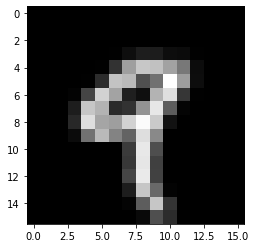

In [7]:
# visualizing the training images
plt.imshow(images[4].numpy().squeeze(), cmap='gray')

The fourth sample is a "9".


Build a Convolutional Network class with two Convolutional layers and one fully connected layer. Pre-determine the size of the final output matrix. The parameters in the constructor are the number of output channels for the first and second layer.


In [8]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    

<h2 id="Train">Define the Convolutional Neural Network Classifier, Criterion function, Optimizer and Train the Model</h2> 


Define the loss function,learning rate, the optimizer and the model

In [9]:
# Create the model object using Net class

model = CNN()

criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

CNN(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)


Train the model and determine validation accuracy 

In [10]:
# Train the model

n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        
        cost_list.append(COST)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)

        print("Epoch {} - COST: {} - Accuracy : {}".format(epoch+1,COST,accuracy))

train_model(n_epochs)

Epoch 1 - COST: 101.75151062011719 - Accuracy : 0.9636
Epoch 2 - COST: 40.608795166015625 - Accuracy : 0.9812
Epoch 3 - COST: 31.39940643310547 - Accuracy : 0.981
Epoch 4 - COST: 29.760025024414062 - Accuracy : 0.9848
Epoch 5 - COST: 28.243642807006836 - Accuracy : 0.9809
Epoch 6 - COST: 26.71988868713379 - Accuracy : 0.9846
Epoch 7 - COST: 27.240243911743164 - Accuracy : 0.9849
Epoch 8 - COST: 23.26902961730957 - Accuracy : 0.9854
Epoch 9 - COST: 27.509855270385742 - Accuracy : 0.9836
Epoch 10 - COST: 23.4899845123291 - Accuracy : 0.9824


In [11]:
print(cost_list)
print(accuracy_list)

[tensor(101.7515), tensor(40.6088), tensor(31.3994), tensor(29.7600), tensor(28.2436), tensor(26.7199), tensor(27.2402), tensor(23.2690), tensor(27.5099), tensor(23.4900)]
[0.9636, 0.9812, 0.981, 0.9848, 0.9809, 0.9846, 0.9849, 0.9854, 0.9836, 0.9824]


<h2 id="Result">Analyze Results</h2> 


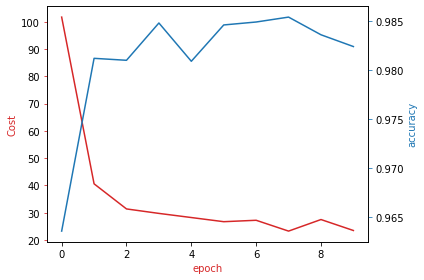

In [12]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

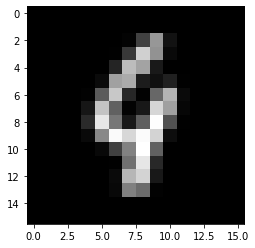

yhat:  tensor([9])


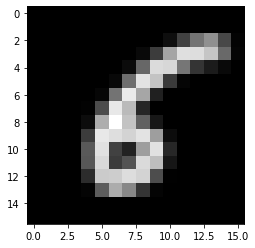

yhat:  tensor([5])


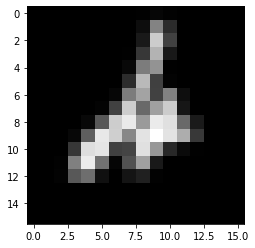

yhat:  tensor([2])


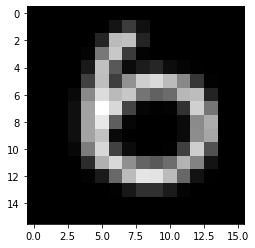

yhat:  tensor([0])


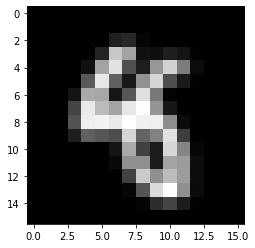

yhat:  tensor([4])


In [14]:
# Plot the mis-classified samples
count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        plt.imshow(x.numpy().squeeze(), cmap='gray')
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break  